**Pressione SHIFT+ENTER para executar a célula**

# Alegrete

Este notebook fornece algumas visualizações para o trabalho de regressão linear. Para conseguir usar, implemente as funções no seu `alegrete.py` e tenha as bibliotecas `numpy` e `matplotlib` instaladas.

O notebook usa um conjunto de dados sintetico. Adapte-o para carregar e usar os dados do `alegrete.csv`.

### Imports das bibliotecas de plot e da solucao implementada

In [1]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import alegrete

### Visualizacao dos dados

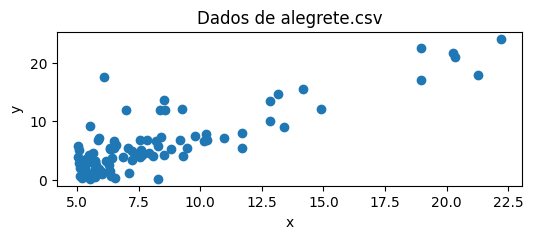

In [1]:
# dataset alegrete.csv
dataset = np.genfromtxt('alegrete.csv', delimiter=',', skip_header=0)

#Gráfico dos dados
plt.figure(figsize=(6, 2))
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados de alegrete.csv')
plt.show()

### Execucao da regressao linear e calculo do EQM por epoca/iteracao

Considere o parâmetro b o coeficiente linear (theta_0, visto em aula) e w o coeficiente angular (theta_1, visto em aula).

Iteração 1/20: b = 0.12310982580645162, w = 1.3698205869217206, MSE = 37.32681007249459
Iteração 2/20: b = 0.0170203033148969, w = 0.42855118027826067, MSE = 23.347301612891087
Iteração 3/20: b = 0.06885454005607627, w = 1.078900421131296, MSE = 16.70859629440049
Iteração 4/20: b = 0.012004173829655504, w = 0.6331091396887755, MSE = 13.551655765690938
Iteração 5/20: b = 0.03007963545543019, w = 0.9422121421455022, MSE = 12.046157400488513
Iteração 6/20: b = -0.0033701448717839595, w = 0.7314189748254076, MSE = 11.323988093967769
Iteração 7/20: b = -0.001259760026486277, w = 0.8786660110908071, MSE = 10.973405811394445
Iteração 8/20: b = -0.023564390477785975, w = 0.7793266506623664, MSE = 10.79912299128091
Iteração 9/20: b = -0.028979954796064075, w = 0.849801644645014, MSE = 10.708515327473343
Iteração 10/20: b = -0.04595245768626596, w = 0.8033196893654019, MSE = 10.657651175007542
Iteração 11/20: b = -0.054891666339379266, w = 0.8373775448673025, MSE = 10.625693572629157
Iteração 12

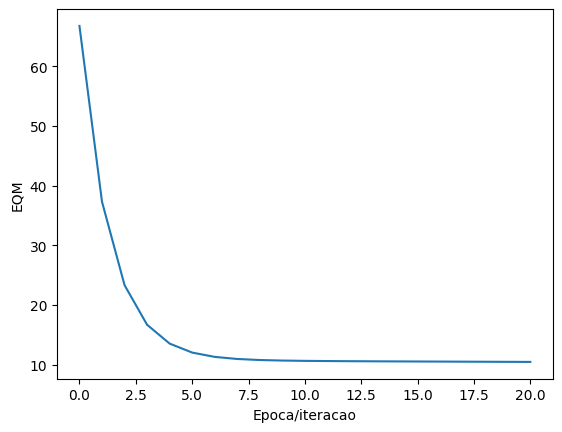

In [1]:
b_history, w_history = alegrete.fit(
    dataset, b=0, w=0,
    alpha=0.01, num_iterations=20
)

# valores finais de theta0 e theta1
final_b, final_w = b_history[-1], w_history[-1]

mse_list = [alegrete.compute_mse(b, w, dataset) for b, w in zip(b_history, w_history)]
print(f"EQM final: {mse_list[-1]}")


plt.plot(mse_list)
plt.xlabel('Epoca/iteracao')
plt.ylabel('EQM')
plt.show()

### Plot da curva final

Curva encontrada: 0.8342105417267768*x + -0.16409738159687365


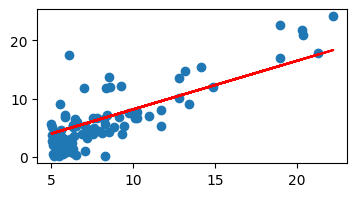

In [1]:
#Imprimir parâmetros otimizados
print (f'Curva encontrada: {final_w}*x + {final_b}')

#plota os dados
plt.figure(figsize=(4, 2))
plt.scatter(dataset[:,0], dataset[:,1])

# plota a curva de ajuste
pred = final_w*dataset[:,0] + final_b
plt.plot(dataset[:,0], pred, c='r')
plt.show()




### Progresso da descida do gradiente com o número de iterações

Execute a celula e use os controles abaixo do grafico para visualizar o progresso do seu ajuste

Pode aparecer um grafico "extra" abaixo da animacao, apenas ignore.

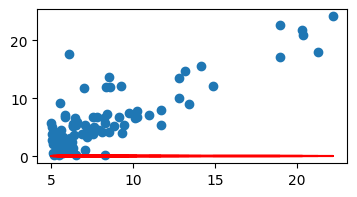

In [1]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)

# conjunto de dados
ax.scatter(dataset[:,0], dataset[:,1])

# linha com os valores iniciais dos parametros
pred = w_history[0]*dataset[:,0] + b_history[0]
line, = ax.plot(dataset[:,0], pred, '-',c='r')

# funcao que atualiza a linha a cada passo
def animate(i):
    pred = w_history[i] * dataset[:,0] + b_history[i]
    line.set_ydata(pred)
    return line,

# mude interval para trocar a velocidade da animacao
ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=200)
HTML(ani.to_jshtml())